# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

*Para el paso 1 solamente tenemos que leer los datos y analizar cada DataFrame para ver posibles oportunidades y despues usar los parametros correctos para poder leer bien los datos*

In [1]:
# importar librerías
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames
orders= pd.read_csv("/content/instacart_orders.csv",sep=";")
products= pd.read_csv("/content/products.csv",sep=";")
order_products= pd.read_csv("/content/order_products.csv",sep=";")
aisles= pd.read_csv("/content/aisles.csv",sep=";")
departments= pd.read_csv("/content/departments.csv",sep=";")

In [3]:
# mostrar información del DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
order_products.info(show_counts=True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


## Conclusiones

*Se puede observar que todos los DataFrames se tienen que modificar, por que aparecen con solamente una columna y eso no esta bien.*

*Se tiene que poner el parametro sep= a la funcion read_csv() con el delimitador que tenga cada DataFrame, en este caso fue el ";".*



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

*Primero separare las columnas de cada DataFrame, despues verificare si tiene valores duplicados o ausentes y analizare porque motivo el valor esta ahi y si vale la pena eliminarlo o dejarlo.*

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(orders.duplicated().sum())
print("")
ordenes_duplicados = orders[orders.duplicated()]
print(ordenes_duplicados)




15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48        

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

*Si hay ordenes duplicadas, las ordenes duplicadas tienen en comun que se hicieron en el mismo dia y la misma hora.*

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
orders.loc[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

*El resultado indica todos los usuarios que hicieron un pedido el miercoles a las 2:00 a.m..*
*Por lo tanto seria ilogico que un mismo usuario hiciera el mismo pedido dos veces el mismo dia a la misma hora*

In [10]:
# Elimina los pedidos duplicados
orders.drop_duplicates(inplace=True) # Borre las lineas duplicadas
orders.reset_index(drop=True, inplace=True)#Actualize los indices para que no haya indices salteados

In [11]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().sum()

np.int64(0)

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders['order_id'].duplicated().sum()

np.int64(0)

Describe brevemente tus hallazgos y lo que hiciste con ellos

*Primero verifique si habia valores duplicados en todo el DataFrame, despues vi cuales eran exactamente. Con este hallazgo me di cuenta que no es logico que un usuario tenga el mismo pedido el mismo dia y la misma hora, aparte que en la columna order_number ya tiene todos los pedidos acumulados por cliente, lo que nos dice que solamente tiene que ver un numero de ID de pedidos por cliente*

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()

np.int64(0)

In [14]:
# Revisa únicamente si hay ID de productos duplicados
products['product_id'].duplicated().sum()

np.int64(0)

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
products['product_name'].duplicated().sum()


np.int64(1361)

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
productos_duplicados_no_faltantes=products['product_name'].dropna().duplicated().sum()
print(productos_duplicados_no_faltantes)


104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

*Primero verifique si hay datos duplicados en el DataFrame en conjunto y no habia, pero verifique si habia datos duplicados solamente en la columna ['product_name'] y si habia pero esa misma columna tambien tiene datos faltantes por lo que eso aumento los datos duplicados, por lo tanto tenemos que eliminar solamente las filas con los datos duplicados sin contar los datos ausentes.*

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

np.int64(0)

In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos
departments["department_id"].duplicated().sum()

np.int64(0)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

*En el DataFrame departments.csv, aparentemente no hay datos duplicados, ni datos ausentes, por lo que no hay mucho que modificar*

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

np.int64(0)

In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
aisles['aisle_id'].duplicated().sum()


np.int64(0)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

*En el DataFrame aisles.csv, aparentemente no hay datos duplicados, ni datos ausentes, por lo que no hay mucho que modificar*

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()

np.int64(0)

In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products['order_id'].duplicated().sum())
print(order_products['product_id'].duplicated().sum())


4094961
4499434


Describe brevemente tus hallazgos y lo que hiciste con ellos.

*En este Dataframe yo pienso que es normal que haya valores duplicados en las columnas ['order_id'] y ['product_id'], porque puede haber varias ordenes pero con diferentes productos y viceversa.*

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
products['product_name'].isna().sum()

np.int64(1258)

Describe brevemente cuáles son tus hallazgos.

*Hay 1,258 datos ausentes en la columna ['product_name'] del DataFrame products.*

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
# La respuesta es si, como se muestra en el siguiente filtrado
products.loc[products['aisle_id'] == 100]


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

*Descubrimos que todos los datos ausentes tienen que ver con el pasillo con ID 100*

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
# La respuesta es si, como se muestra en el siguiente filtrado
products.loc[products['department_id'] == 21]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

*Descubrimos que todos los datos ausentes tienen que ver con el pasillo con ID 100 y con el departamento con ID 21*

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(departments[departments['department_id'] == 21])
print(aisles[aisles['aisle_id'] == 100])

    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.

*Aqui nos dice que no hay informacion para pasillo con ID 100 ni para el departamento con ID 21 para las columnas ['aisle_id'] y ['department_id'] respectivamente*

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

/tmp/ipython-input-27-3586095999.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_name'].fillna('Unknown', inplace=True)


Describe brevemente tus hallazgos y lo que hiciste con ellos.

*Aqui simplemente rellenamos los datos ausentes con "Unknown" en la columna ['product_name'].*

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
orders.isna().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,28817


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
# La respuesta es no, todos los valores ausentes coinciden que el cliente ha hecho solamente un pedido
orders.loc[orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


Describe brevemente tus hallazgos y lo que hiciste con ellos.

*Aqui podemos ver que los valores ausentes coinciden con que el cliente solamente ha hecho un pedido*

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
order_products.isna().sum()

,0
order_id,0
product_id,0
add_to_cart_order,836
reordered,0


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

*En la columna ['add_to_cart_order'] tenemos 836 datos ausentes y podemos ver que el maximo de articulos en el que se añadio en un pedido(cliente) fue de 64 articulos.*

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_products.loc[order_products['add_to_cart_order'].isna()]['order_id']


,order_id
737,2449164
9926,1968313
14394,2926893
16418,1717990
30114,1959075
...,...
4505662,1800005
4511400,1633337
4517562,404157
4534112,1673227


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# La respuesta es no
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

print(order_products.loc[order_products['add_to_cart_order'].isna()]['order_id'].groupby(order_products['order_id']).count().min())
print(order_products.loc[order_products['add_to_cart_order'].isna()]['order_id'].groupby(order_products['order_id']).count().max())


1
63


Describe brevemente cuáles son tus hallazgos.

*Descubrimos que cada uno de los pedidos que tienen valores ausentes en la columna ['add_to_cart_order'] tienen menos de 64 productos, esto tomando en cuenta solo las lineas con valores ausentes.*

*Tomando en cuenta todos lo valores del DataFrame es otro resultado.*

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

/tmp/ipython-input-34-172734512.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_products['add_to_cart_order'].fillna(999, inplace=True)


Describe brevemente tus hallazgos y lo que hiciste con ellos.

*Aqui simplemente rellenamos los datos ausentes en la columna ['add_to_cart_order'] por "999" y convertimos la misma columna a tipo de dato entero*

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

*Este paso para mi es el mas importante porque tienes que analizar y procesar muy bien los datos para poder obtener informacion real y confiable. Tenemos que tener mucho cuidado en borrar datos que proporcionan informacion valiosa o dejar datos que puedan afectar a la mala interpretacion de la informacion final*


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
#Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders
#sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile
#entre 0 y 6).
print(orders["order_hour_of_day"].sort_values())
print("")
print(orders["order_dow"].sort_values())

198889     0
414118     0
32291      0
414051     0
394799     0
          ..
284287    23
478929    23
284270    23
339419    23
203346    23
Name: order_hour_of_day, Length: 478952, dtype: int64

27        0
25        0
23        0
388876    0
388897    0
         ..
478928    6
478915    6
0         6
478946    6
26        6
Name: order_dow, Length: 478952, dtype: int64


Escribe aquí tus conclusiones

*Aqui podemos ver que los valores de las columnas ["order_hour_of_day"] y ["order_dow"] tienen valores de entre 0 a 23 y 0 a 6  respectivamente*

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

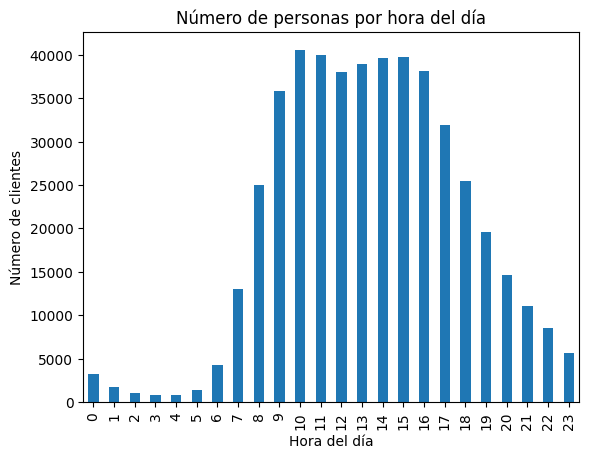

In [36]:
#Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
from matplotlib import pyplot as plt
import pandas as pd

orders.groupby("order_hour_of_day")["user_id"].count().plot(kind="bar")
plt.xlabel("Hora del día")
plt.ylabel("Número de clientes")
plt.title("Número de personas por hora del día")

plt.show()

Escribe aquí tus conclusiones

*Aqui podemos ver cuantas personas hicieron ordenes por hora del dia, podemos ver que las horas donde los clientes estan mas activos es de las 10a.m. hasta las 4p.m..*

### [A3] ¿Qué día de la semana compran víveres las personas?

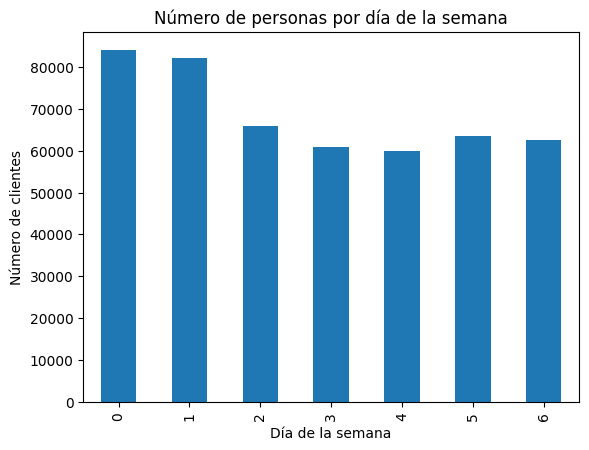

In [37]:
#Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
orders.groupby("order_dow")["user_id"].count().plot(kind="bar")
plt.xlabel("Día de la semana")
plt.ylabel("Número de clientes")
plt.title("Número de personas por día de la semana")

plt.show()

Escribe aquí tus conclusiones.

*Podemos observar que todos los dias las personas compran viveres pero el dia que predomina mas es el domingo*

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

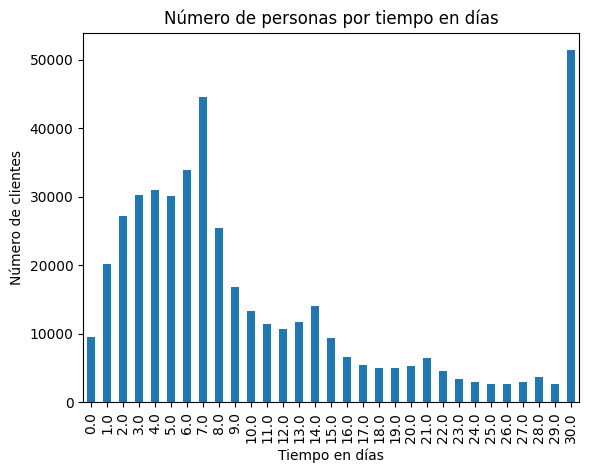

In [38]:
#Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

orders.groupby("days_since_prior_order")["user_id"].count().plot(kind="bar")
plt.xlabel("Tiempo en días")
plt.ylabel("Número de clientes")
plt.title("Número de personas por tiempo en días")

plt.show()

Escribe aquí tus conclusiones

*Podemos observar hay una gran cantidad de personas que tardan un mes para hacer un nuevo pedido y tambien hay una minima poblacion que se tarda entre 22 a 29 dias en realizar su siguiente pedido*

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

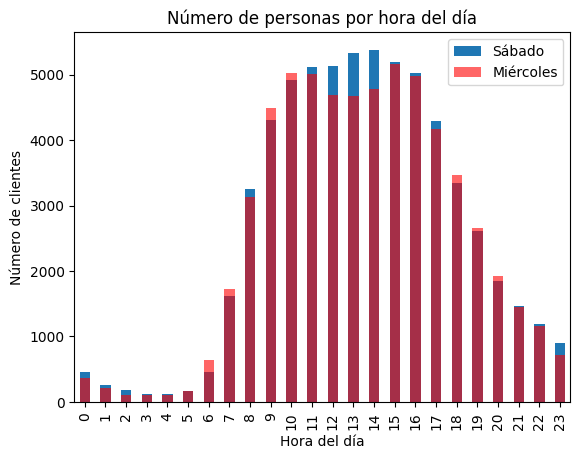

In [39]:
#¿Existe alguna diferencia entre las distribuciones 'order_hour_of_day' de los miércoles y los sábados? Traza gráficos de barra de 'order_hour_of_day' para ambos días en la misma figura y describe las diferencias que observes.

orders_sábado = orders[orders['order_dow'] == 6]
orders_miércoles = orders[orders['order_dow'] == 3]

orders_sábado.groupby("order_hour_of_day")["user_id"].count().plot(kind="bar", label="Sábado")
orders_miércoles.groupby("order_hour_of_day")["user_id"].count().plot(kind="bar", label="Miércoles",alpha=0.6,color="red")
plt.xlabel("Hora del día")
plt.ylabel("Número de clientes")
plt.title("Número de personas por hora del día")
plt.legend(["Sábado","Miércoles"])

plt.show()

Escribe aquí tus conclusiones

*En general son muy similares los dias miercoles y sabados excepto en las horas de 11a.m. hasta las 3p.m. el dia sabadado hay mas pedidos, en conclusion el dia sabado hay mas pedidos que el miercoles.*

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

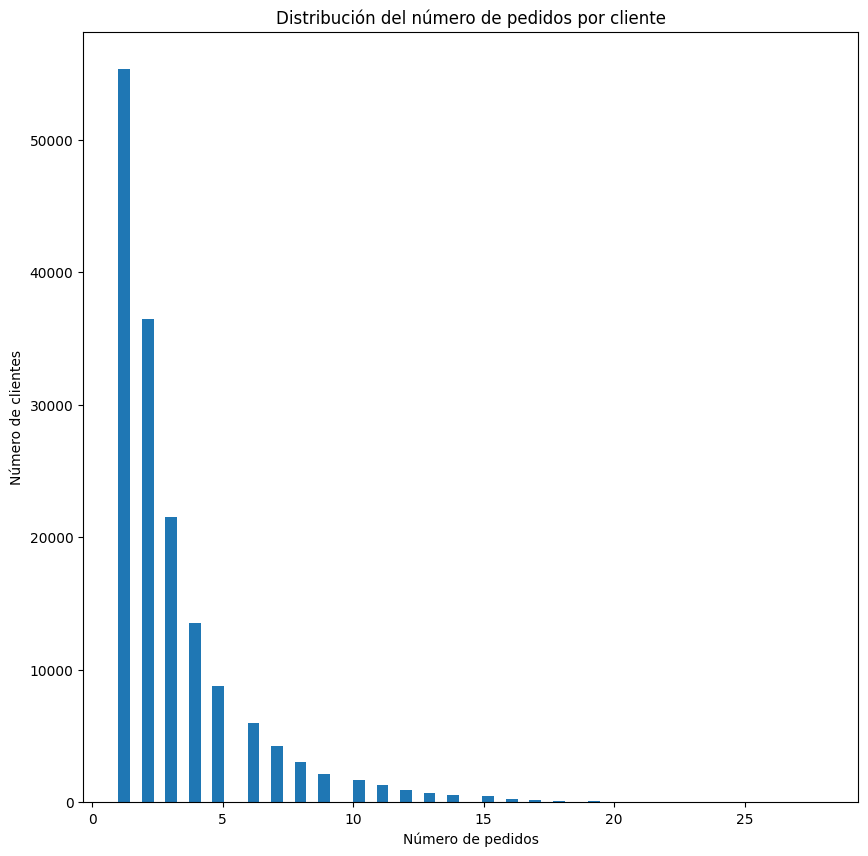

In [40]:
#Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).

orders.groupby("user_id")["order_id"].count().plot(kind="hist", bins=60,figsize= [10,10])
plt.xlabel("Número de pedidos")
plt.ylabel("Número de clientes")
plt.title("Distribución del número de pedidos por cliente")

plt.show()

Escribe aquí tus conclusiones

*Podemos ver que la mayoria de los clientes pidieron solamente entre 1 y 5 pedidos*

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [41]:
#¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?
productos_principales= order_products.groupby("product_id")["order_id"].count().sort_values(ascending=False).head(20)
numero_de_pedidos= order_products.groupby("product_id")["order_id"].count()
productos_principales= pd.DataFrame(productos_principales)
numero_de_pedidos= pd.DataFrame(numero_de_pedidos)
numero_de_pedidos= numero_de_pedidos.rename(columns={"order_id":"numero_de_pedidos"})
productos_principales= pd.merge(productos_principales, products, on="product_id")
productos_principales= pd.merge(productos_principales, numero_de_pedidos, on="product_id")
productos_principales= productos_principales[["product_id","product_name","numero_de_pedidos"]]
print(productos_principales)

    product_id              product_name  numero_de_pedidos
0        24852                    BANANA              66050
1        13176    BAG OF ORGANIC BANANAS              53297
2        21137      ORGANIC STRAWBERRIES              37039
3        21903      ORGANIC BABY SPINACH              33971
4        47209      ORGANIC HASS AVOCADO              29773
5        47766           ORGANIC AVOCADO              24689
6        47626               LARGE LEMON              21495
7        16797              STRAWBERRIES              20018
8        26209                     LIMES              19690
9        27845        ORGANIC WHOLE MILK              19600
10       27966       ORGANIC RASPBERRIES              19197
11       22935      ORGANIC YELLOW ONION              15898
12       24964            ORGANIC GARLIC              15292
13       45007          ORGANIC ZUCCHINI              14584
14       39275       ORGANIC BLUEBERRIES              13879
15       49683            CUCUMBER KIRBY

Escribe aquí tus conclusiones

*Primero agrupamos los productos y contamos todos sus pedidos y lo ordenamos de mayor a menor, despues tuvimos que unir este filtrado al DataFrame products.csv para poder mostrar el nombre del producto.*

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

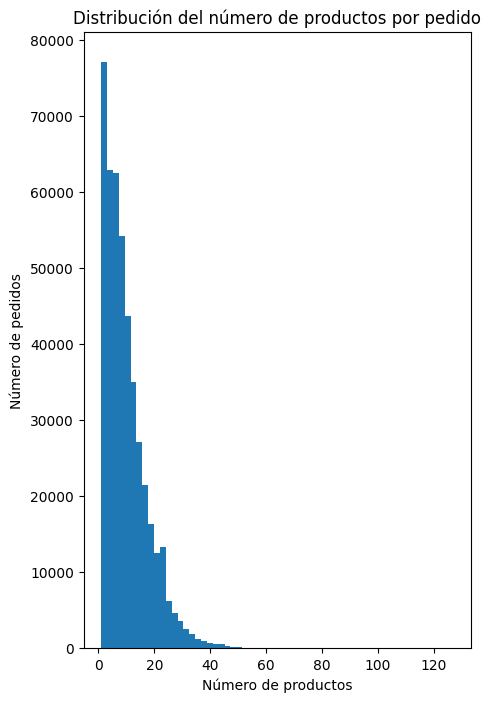

In [42]:
#¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
order_products.groupby("order_id")["product_id"].count().plot(kind="hist", bins=60,figsize= [5,8])
plt.xlabel("Número de productos")
plt.ylabel("Número de pedidos")
plt.title("Distribución del número de productos por pedido")

plt.show()

Escribe aquí tus conclusiones

*Se puede observar que la mayoria de los clientes hacen pedidos de entre 1 a 10 articulos, entre mas articulos agregen al pedido menos pedidos hay.*

*Hay valores atipicos de entre 50 a 127 articulos, por lo que no se puede observar en la grafica, tal vez esta grafica no sea la mas adecuada*

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [75]:
#¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
productos_principales_reordenado= order_products.query('reordered == 1')

productos_principales= productos_principales_reordenado.groupby("product_id")["order_id"].count().sort_values(ascending=False).head(20)
numero_de_pedidos= productos_principales_reordenado.groupby("product_id")["order_id"].count()

productos_principales= pd.DataFrame(productos_principales)
numero_de_pedidos= pd.DataFrame(numero_de_pedidos)

numero_de_pedidos= numero_de_pedidos.rename(columns={"order_id":"numero_de_pedidos"})

productos_principales= pd.merge(productos_principales, products, on="product_id")
productos_principales= pd.merge(productos_principales, numero_de_pedidos, on="product_id")

productos_principales= productos_principales[["product_name","product_id","numero_de_pedidos"]].sort_values(by="numero_de_pedidos",ascending=False)
print(productos_principales)

                product_name  product_id  numero_de_pedidos
0                     BANANA       24852              55763
1     BAG OF ORGANIC BANANAS       13176              44450
2       ORGANIC STRAWBERRIES       21137              28639
3       ORGANIC BABY SPINACH       21903              26233
4       ORGANIC HASS AVOCADO       47209              23629
5            ORGANIC AVOCADO       47766              18743
6         ORGANIC WHOLE MILK       27845              16251
7                LARGE LEMON       47626              15044
8        ORGANIC RASPBERRIES       27966              14748
9               STRAWBERRIES       16797              13945
10                     LIMES       26209              13327
11      ORGANIC YELLOW ONION       22935              11145
12            ORGANIC GARLIC       24964              10411
13          ORGANIC ZUCCHINI       45007              10076
14            CUCUMBER KIRBY       49683               9538
15        ORGANIC FUJI APPLE       28204

Escribe aquí tus conclusiones

*Primero filtramos si el producto ya fue pedido, despues agrupamos los productos y contamos todos sus pedidos y lo ordenamos de mayor a menor, despues tuvimos que unir este filtrado al DataFrame products.csv para poder mostrar el nombre del producto.*

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

                                            product_name  product_id  \
0                                                 BANANA       24852   
1                                 BAG OF ORGANIC BANANAS       13176   
2                                   ORGANIC STRAWBERRIES       21137   
3                                   ORGANIC BABY SPINACH       21903   
4                                   ORGANIC HASS AVOCADO       47209   
...                                                  ...         ...   
45568                                     COCONUT FLAVOR        5400   
45569                                   ORGANIC RED PEAR        5398   
45570  BEACH DEFENSE SUNSCREEN LOTION BROAD SPECTRUM ...       44197   
45571  ULTRA PROTEIN POWER CRUNCH PEANUT BUTTER N' HO...       49663   
45572                       BACON CHEDDAR PRETZEL PIECES       49662   

       tasa_repetición  
0             0.146763  
1             0.118426  
2             0.082300  
3             0.075483  
4         

Text(0.5, 1.0, 'Distribución de la tasa de repetición')

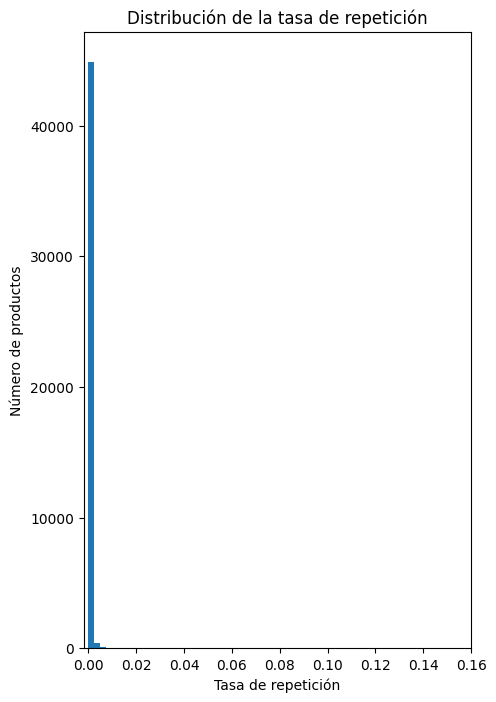

In [ ]:
#Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
productos_repetidos= order_products.groupby("product_id")["order_id"].count().sort_values(ascending=False)
total_pedidos= len(order_products["order_id"].unique())
productos_repetidos= productos_repetidos/total_pedidos
productos_repetidos= pd.DataFrame(productos_repetidos)
productos_repetidos= productos_repetidos.rename(columns={"order_id":"tasa_repetición"})
productos_repetidos = productos_repetidos.reset_index()
productos_repetidos= pd.merge(productos_repetidos, products, on="product_id")
productos_repetidos= productos_repetidos[["product_name","product_id","tasa_repetición"]]
print(productos_repetidos)
print("")
productos_repetidos["tasa_repetición"].plot(kind="hist", bins=60,figsize= [5,8],xlim=(-0.002,0.16))
plt.xlabel("Tasa de repetición")
plt.ylabel("Número de productos")
plt.title("Distribución de la tasa de repetición")


Escribe aquí tus conclusiones

*Para calcular la tasa de repetición del pedido tuvimos que crear una culumna nueva, para esto tuvimos que dividir todo el filtrado(productos_repetidos) entre el calculo que hicmos(total_pedidos) y lo guardamos en la misma variable de productos_reperidos, despues esta variable la convertimos en DataFrame para poder modificar los nombres de las columnas y para que se vea mas bonito agregamos el nombre del producto como lo hicimos en el ejercicio anterior*

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

         user_id  product_id  tasa_repetición
1924854   206209       28156         0.000036
1924855   206209        2280         0.000036
1924856   206209       11791         0.000036
1924857   206209        2295         0.000036
3440899   206209       16168         0.000020
...          ...         ...              ...
2454263        2       13176         0.000029
2455499        2       47209         0.000029
2455498        2       22829         0.000029
2455492        2       32792         0.000029
2455491        2       36735         0.000029

[4545007 rows x 3 columns]



Text(0.5, 1.0, 'Distribución de la tasa de repetición')

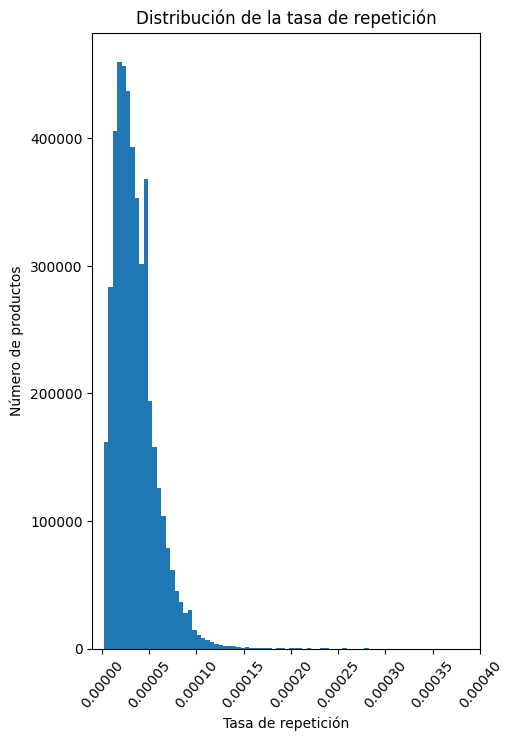

In [ ]:
#Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
productos_repetidos= order_products.groupby("order_id")["product_id"].count().sort_values(ascending=False)
total_pedidos= len(order_products["order_id"].unique())
productos_repetidos= productos_repetidos/total_pedidos
productos_repetidos= pd.DataFrame(productos_repetidos)
productos_repetidos= productos_repetidos.rename(columns={"product_id":"tasa_repetición"})
productos_repetidos = productos_repetidos.reset_index()
productos_repetidos= pd.merge(productos_repetidos, orders, on="order_id")
productos_repetidos= pd.merge(productos_repetidos, order_products, on="order_id")
productos_repetidos= productos_repetidos[["user_id","product_id","tasa_repetición"]].sort_values(by="user_id",ascending=False)
print(productos_repetidos)
print("")
productos_repetidos["tasa_repetición"].plot(kind="hist", bins=60,figsize= [5,8],xlim=(-0.00001,0.00040),rot=50)
plt.xlabel("Tasa de repetición")
plt.ylabel("Número de productos")
plt.title("Distribución de la tasa de repetición")

Escribe aquí tus conclusiones

*En este ejercicio resalta la importancia de la funcion merge(), hicimos exactamente lo mismo que el ejercicio anterior solo que tuvimos que llamar dos veces merge() para que nuestro DataFrame final tuviera las columnas user_id y product_id*

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [74]:
#¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?
productos_principales_primer_articulo= order_products.query("add_to_cart_order == 1")
productos_principales= productos_principales_primer_articulo.groupby("product_id")["add_to_cart_order"].count().sort_values(ascending=False).head(20)

numero_de_veces= productos_principales_primer_articulo.groupby("product_id")["add_to_cart_order"].count()

productos_principales= pd.DataFrame(productos_principales)
numero_de_veces= pd.DataFrame(numero_de_veces)

numero_de_veces= numero_de_veces.rename(columns={"add_to_cart_order":"numero_de_veces"})

productos_principales= pd.merge(productos_principales, products, on="product_id")
productos_principales= pd.merge(productos_principales, numero_de_veces, on="product_id")

productos_principales= productos_principales[["product_id","product_name","numero_de_veces"]].sort_values(by="numero_de_veces",ascending=False)
print(productos_principales)




    product_id                 product_name  numero_de_veces
0        24852                       BANANA            15562
1        13176       BAG OF ORGANIC BANANAS            11026
2        27845           ORGANIC WHOLE MILK             4363
3        21137         ORGANIC STRAWBERRIES             3946
4        47209         ORGANIC HASS AVOCADO             3390
5        21903         ORGANIC BABY SPINACH             3336
6        47766              ORGANIC AVOCADO             3044
7        19660                 SPRING WATER             2336
8        16797                 STRAWBERRIES             2308
9        27966          ORGANIC RASPBERRIES             2024
10       44632   SPARKLING WATER GRAPEFRUIT             1914
11       49235          ORGANIC HALF & HALF             1797
12       47626                  LARGE LEMON             1737
13         196                         SODA             1733
14       38689     ORGANIC REDUCED FAT MILK             1397
15       26209          

In [68]:
order_products.query("product_id == 24852 and add_to_cart_order == 1")

,order_id,product_id,add_to_cart_order,reordered
109,3176371,24852,1,1
424,1544211,24852,1,1
603,1952076,24852,1,1
759,1213467,24852,1,0
874,3295996,24852,1,1
...,...,...,...,...
4542791,303250,24852,1,1
4543643,3252674,24852,1,1
4544539,2039154,24852,1,1
4544842,3402221,24852,1,1


Escribe aquí tus conclusiones

*Primero verificamos si el producto fue el primero es agregar al carrito, despues ordenamos dos variables para ver los productos principales que la gente pone en su carrito y para ver las veces que lo hacen por producto, despues esas variables las convertimos en DataFrames para despues conbinarlas entre si y poder ver las columnas que queramos ver.*

### Conclusion general del proyecto:

*Este proyecto se me hizo mur retador e interesante a la vez, porque en todos los pasos tienes que analizar muy bien la informacion, primero para ver que la informacion que te dan esta bien estructura, segundo para corregir los datos duplicados y ausentes para que despues en la muestra de resultados no tener informacion falsa y tambien en el ultimo paso se tiene que tener mucho cuidado con la informacion que se quiera mostrar ya que para cada informacion se requiere de diferentes graficas y tiene que ser claro para la audiencia.*